5000.0


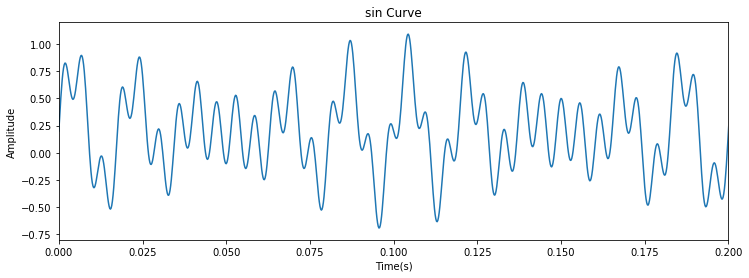

In [2]:
#1 a) the plot of the voltage function
import numpy as np
import matplotlib.pyplot as plt

f=5.0 
T=1/f
fs=1000.0*f

Ts=1/fs # horizontal spacing of the points that "fake" a continuous signal
cycles=20  # how many cycles of the wave to save
t=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
#voltage function
V= 0.3*np.sin(2*np.pi*50*t) +0.3*np.sin(2*np.pi*175*t) +0.3*np.sin(2*np.pi*60*t) +0.2

plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.8,1.2]) # we’re not plotting all cycles to make it easier to see what’s going on
plt.plot(t,V)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("sin Curve")
print(fs)

Text(0.5, 1.0, 'sin Curve')

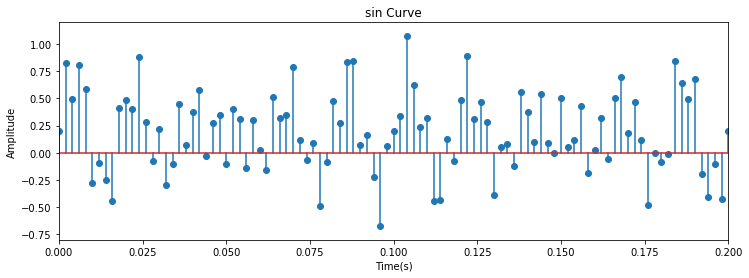

In [3]:
#1 b) sample and hold
import numpy as np
import matplotlib.pyplot as plt

f=5.0 
T=1/f
fs=500

Ts=1/fs # horizontal spacing of the points that "fake" a continuous signal
cycles=20  # how many cycles of the wave to save
tsamp=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
#voltage function
Vsamp= 0.3*np.sin(2*np.pi*50*tsamp) +0.3*np.sin(2*np.pi*175*tsamp) +0.3*np.sin(2*np.pi*60*tsamp) +0.2

plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.8,1.2]) # we’re not plotting all cycles to make it easier to see what’s going on

plt.stem(tsamp,Vsamp)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("sin Curve")


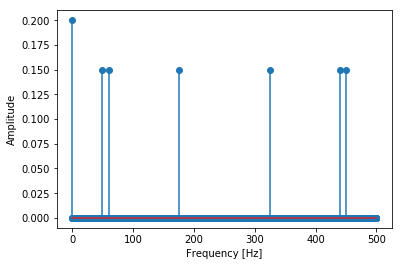

In [4]:
#1. c)
fft = np.fft.fft(Vsamp) #xsamp is your stem plot data
N = Vsamp.size
f = np.linspace(0, fs, N) 
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.stem(f,np.abs(fft)/N)
plt.show()
#the fourier transform peaked at where I espect it at 50,60, 175 and 0 HZ

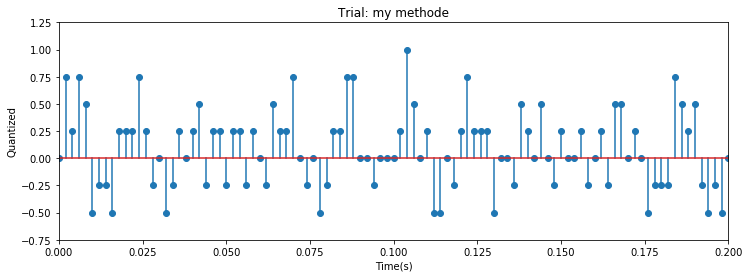

In [5]:
#1. d) 8 bit set range form -0.75 to 1.25
Vlevel = [-0.5,-0.25,0.0,0.25,0.50,0.75,1.0,1.25]


#quantize using own funtion
out = [0]*len(Vsamp)

j=0
while j < len(out):
    i=1
    while i<len(Vlevel):
        if(Vlevel[i]>Vsamp[j] and Vlevel[i-1]<Vsamp[j]):
            out[j]= Vlevel[i-1]
        
        i+=1
    j+=1

plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.75,1.25]) # we’re not plotting all cycles to make it easier to see what’s going on
plt.stem(tsamp,out)
plt.xlabel("Time(s)")
plt.ylabel("Quantized")
plt.title("Trial: my methode")
plt.show()

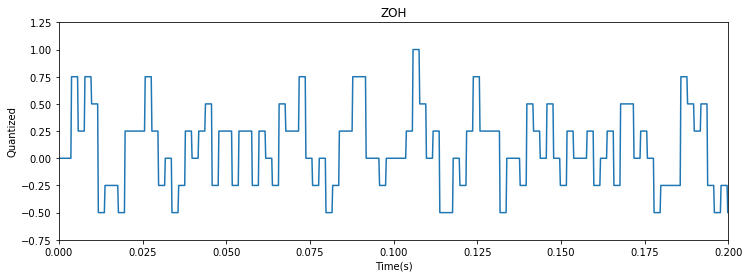

In [6]:
#1. e)
ZOH = [1]*20000
hold1 = out[0]
i = 0 
j = 0

while i < len(t):
    if((i+1)%10==0):
        hold1= out[j]
        ZOH[i]=hold1
        j+=1
    else:
        ZOH[i]=hold1
    i+=1
plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.75,1.25]) # we’re not plotting all cycles to make it easier to see what’s going on
plt.axis([0,0.2,-0.75,1.25])
plt.plot(t,ZOH)

plt.xlabel("Time(s)")
plt.ylabel("Quantized")
plt.title("ZOH")
plt.show()

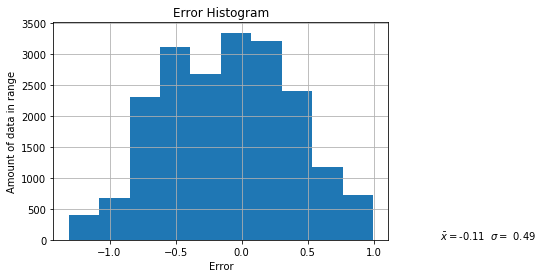

In [7]:
#f)plot error
error =[-6]*20000
i=0
while i < len(t):
    error[i]=ZOH[i]-V[i]
    i+=1
n, bins, patches = plt.hist(error,10)
plt.xlabel("Error"), plt.ylabel("Amount of data in range"), plt.title("Error Histogram")
plt.text(1.5, 0, r'$\bar{x}=$%5.2f  $\sigma=$%5.2f' %(np.mean(error),np.std(error)))

plt.grid(True)
plt.show()

Text(0.5, 1.0, 'sin Curve')

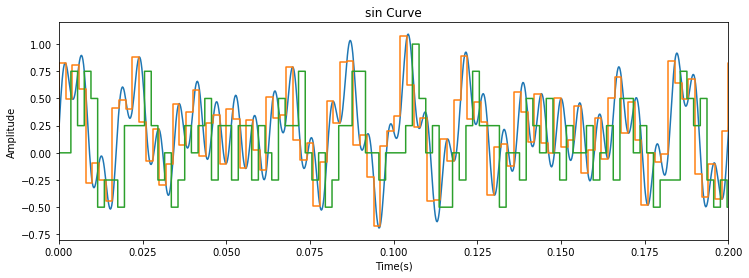

In [8]:
#g)all values on one grapths
plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.8,1.2]) # we’re not plotting all cycles to make it easier to see what’s going on
plt.plot(t,V)
plt.step(tsamp,Vsamp)
plt.step(t,ZOH)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("sin Curve")

KeyboardInterrupt: 

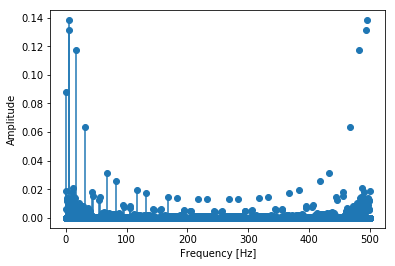

In [9]:
#h)
fft = np.fft.fft(ZOH) #xsamp is your stem plot data
N = 20000
f = np.linspace(0, fs, N) #Tsamp is the rate you sampled at (30 Hz, 12 Hz, 10 Hz, 7 Hz)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.stem(f,np.abs(fft)/N)
plt.show()

In [11]:
#i)
from scipy import signal
cutoff = 400 # cutoff frequency.
#The intensity of all frequencies above this will be reduced.
nyq = 0.5 * 5000 # fs is the sampling rate of x_zoh
normal_cutoff = cutoff / nyq # normalized cutoff frequency
b, a = signal.butter(5, normal_cutoff, 'low')
x_smooth = signal.filtfilt(b, a, ZOH)

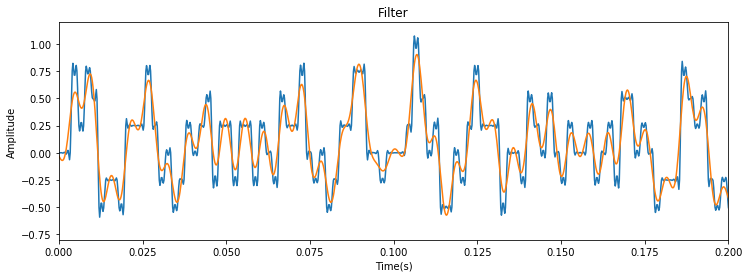

In [13]:
from scipy import signal

cutoff = 1000 # cutoff frequency.
#The intensity of all frequencies above this will be reduced.
nyq = 0.5 * 5000 # fs is the sampling rate of x_zoh
normal_cutoff = cutoff / nyq # normalized cutoff frequency
b, a = signal.butter(5, normal_cutoff, 'low')
x_smooth = signal.filtfilt(b, a, ZOH)

plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.8,1.2]) # we’re not plotting all cycles to make it easier to see what’s going on
plt.plot(t,x_smooth)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Filter")

cutoff = 200 # cutoff frequency.
#The intensity of all frequencies above this will be reduced.
nyq = 0.5 * 5000 # fs is the sampling rate of x_zoh
normal_cutoff = cutoff / nyq # normalized cutoff frequency
b, a = signal.butter(5, normal_cutoff, 'low')
x_smooth = signal.filtfilt(b, a, ZOH)

plt.plot(t,x_smooth)

Text(0.5, 1.0, 'sin Curve')

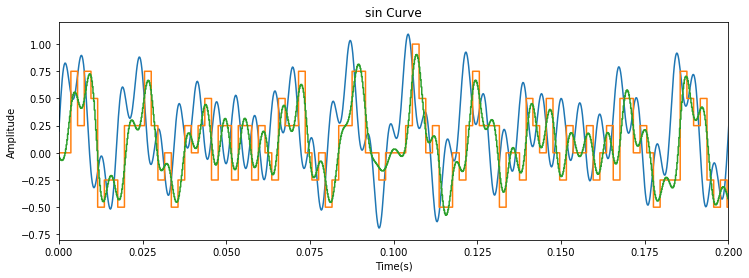

In [14]:
#m)
plt.figure(figsize=(12,4))
plt.axis([0,0.2,-0.8,1.2]) # we’re not plotting all cycles to make it easier to see what’s going on
plt.plot(t,V)
plt.step(t,ZOH)
plt.step(t,x_smooth)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("sin Curve")

KeyboardInterrupt: 

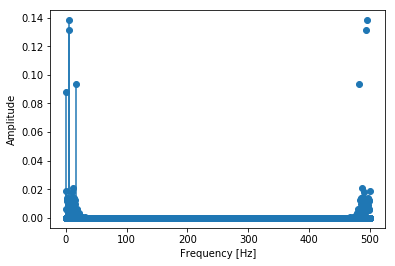

In [15]:
fft = np.fft.fft(x_smooth) #xsamp is your stem plot data
N = 20000
f = np.linspace(0, fs, N) #Tsamp is the rate you sampled at (30 Hz, 12 Hz, 10 Hz, 7 Hz)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.stem(f,np.abs(fft)/N)
plt.show()

In [ ]:
#n

47995


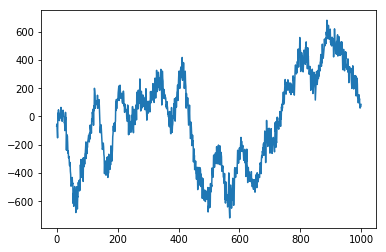

In [18]:
#2.wave files shorten files to save on computing time
#a)512.wav
import IPython
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


fs, data = wavfile.read("512Hz.wav") #fs is the sampling rate
x = data[:,0] # Left Channel
y = data[:,1] # Right Channel

plt.plot(x[1000:2000])
print(x.size)

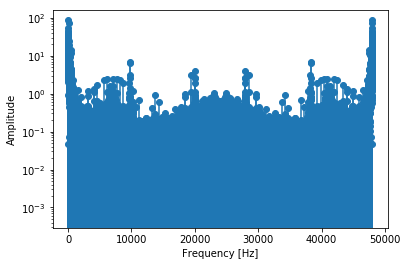

In [19]:
#c)
fft = np.fft.fft(x) #xsamp is your stem plot data
N = x.size
f = np.linspace(0, fs, N) 
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.yscale("log")
plt.stem(f,np.abs(fft)/N)
plt.show()

In [20]:
#filters
hi_cutoff = 450
nyq = 0.5 * fs
normal_cutoff = hi_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="high", analog=False)
output = signal.filtfilt(b, a, x)

low_cutoff = 600
nyq = 0.5 * fs
normal_cutoff = low_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="low", analog=False)
output = signal.filtfilt(b, a, output)

In [21]:
filtered_out = np.asarray(output, dtype=np.int16)
wavfile.write("512_filtered.wav",fs,filtered_out)


In [22]:
IPython.display.Audio("512_filtered.wav")

47995


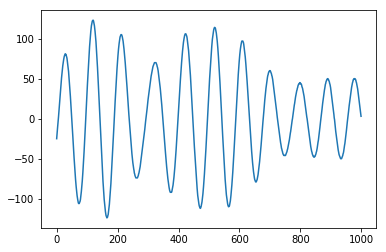

In [23]:
fs, data = wavfile.read("512_filtered.wav") #fs is the sampling rate
x = data # Left Channel


plt.plot(x[1000:2000])
print(x.size)

49000


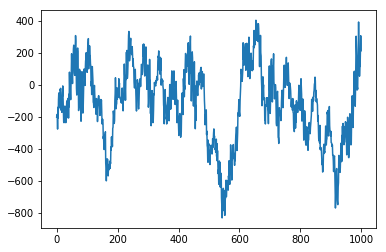

In [24]:
#2.wave files shorten files to save on computing time
#a)1024.wav
import IPython
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


fs, data = wavfile.read("1024Hz.wav") #fs is the sampling rate
x = data[:,0] # Left Channel
y = data[:,1] # Right Channel

plt.plot(x[1000:2000])
print(x.size)

KeyboardInterrupt: 

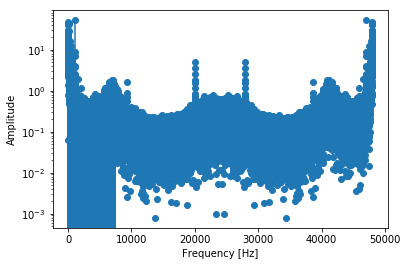

In [25]:
fft = np.fft.fft(x) #xsamp is your stem plot data
N = x.size
f = np.linspace(0, fs, N) 
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.yscale("log")
plt.stem(f,np.abs(fft)/N)
plt.show()

In [26]:
#filters
hi_cutoff = 1000
nyq = 0.5 * fs
normal_cutoff = hi_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="high", analog=False)
output = signal.filtfilt(b, a, x)

low_cutoff = 1050
nyq = 0.5 * fs
normal_cutoff = low_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="low", analog=False)
output = signal.filtfilt(b, a, output)

In [27]:
filtered_out = np.asarray(output, dtype=np.int16)
wavfile.write("1024_filtered.wav",fs,filtered_out)


In [28]:
IPython.display.Audio("512_filtered.wav")

47995


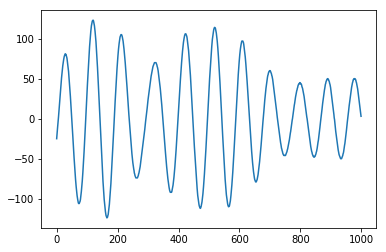

In [29]:
fs, data = wavfile.read("512_filtered.wav") #fs is the sampling rate
x = data # Left Channel


plt.plot(x[1000:2000])
print(x.size)

49459


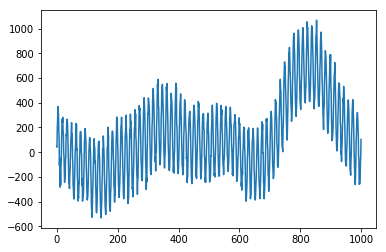

In [30]:
#2.wave files shorten files to save on computing time
#a)512and513.wav
import IPython
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


fs, data = wavfile.read("512and523.wav") #fs is the sampling rate
x = data[:,0] # Left Channel
y = data[:,1] # Right Channel

plt.plot(x[1000:2000])
print(x.size)

KeyboardInterrupt: 

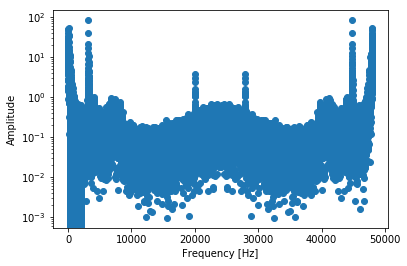

In [31]:
fft = np.fft.fft(x) #xsamp is your stem plot data
N = x.size
f = np.linspace(0, fs, N) 
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.yscale("log")
plt.stem(f,np.abs(fft)/N)
plt.show()

In [32]:
#filters
hi_cutoff = 450
nyq = 0.5 * fs
normal_cutoff = hi_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="high", analog=False)
output = signal.filtfilt(b, a, x)

low_cutoff = 650
nyq = 0.5 * fs
normal_cutoff = low_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="low", analog=False)
output = signal.filtfilt(b, a, output)

In [33]:
filtered_out = np.asarray(output, dtype=np.int16)
wavfile.write("512and523_filtered.wav",fs,filtered_out)


In [34]:
IPython.display.Audio("512and523_filtered.wav")

49459


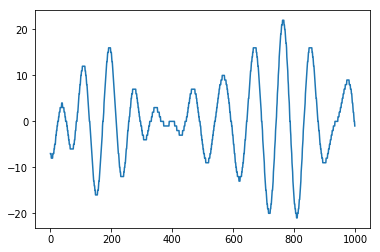

In [35]:
fs, data = wavfile.read("512and523_filtered.wav") #fs is the sampling rate
x = data # Left Channel


plt.plot(x[1000:2000])
print(x.size)

72704


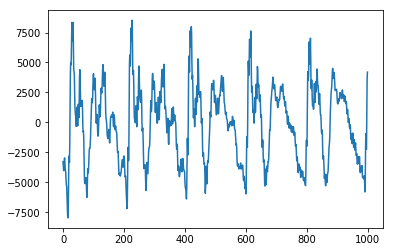

In [95]:
import IPython
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


fs, data = wavfile.read("fox.wav") #fs is the sampling rate
x = data[:,0] # Left Channel
y = data[:,1] # Right Channel

plt.plot(x[1000:2000])
print(x.size)

KeyboardInterrupt: 

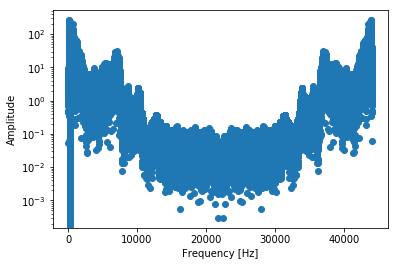

In [61]:
fft = np.fft.fft(x) #xsamp is your stem plot data
N = x.size
f = np.linspace(0, fs, N) 
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.yscale("log")
plt.stem(f,np.abs(fft)/N)
plt.show()

In [96]:
#filters
hi_cutoff = 500
nyq = 0.5 * fs
normal_cutoff = hi_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="high", analog=False)
output = signal.filtfilt(b, a, x)

low_cutoff = 600
nyq = 0.5 * fs
normal_cutoff = low_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype="low", analog=False)
output = signal.filtfilt(b, a, output)

In [97]:
filtered_out = np.asarray(output, dtype=np.int16)
wavfile.write("fox_filtered.wav",fs,filtered_out)

In [98]:
IPython.display.Audio("fox_filtered.wav")

72704


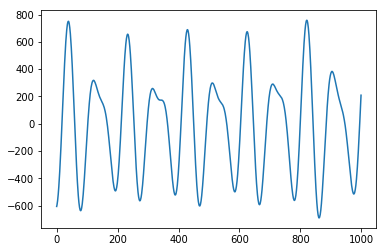

In [101]:
fs, data = wavfile.read("fox_filtered.wav") #fs is the sampling rate
x = data # Left Channel


plt.plot(x[1000:2000])
print(x.size)

### 